In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date

#### The following tables and data is from the "On the Mode of Communication of Cholera (2nd edition)" by Dr. John Snow. (published in 1854)

##### Table 1: broad street outbreak mortality 1854

In [2]:
start_date_1 = date(1854,8,19)
end_date_1 = date(1854,9,30)
dates_1 = list(pd.date_range(start_date_1, end_date_1,freq='d').astype('str'))
dates_1.append('Unknown Date')

In [4]:
number_of_fatal_attacks_1 = [1,1,1,0,1,1,0,1,1,1,1,8,56,143,116,54,46,36,20,28,12,11,5,5,1,3,0,1,4,2,3,0,0,2,1,1,1,1,1,1,0,0,0,45]

# Sanity Check
pd.Series(number_of_fatal_attacks_1).sum()

616

In [5]:
deaths_1 = [1,0,2,0,0,2,0,0,1,0,1,2,3,70,127,76,71,45,37,32,30,24,18,15,6,13,6,8,6,5,2,3,0,0,2,3,0,0,2,0,2,1,0,0]

# check
pd.Series(deaths_1).sum()

616

In [6]:
# creating the dataframe with index as the day count
table_1_df = pd.DataFrame({'Date': dates_1,
                            'No. of Fatal Attacks': number_of_fatal_attacks_1,
                           'Deaths': deaths_1}, index=range(1,45))
table_1_df.head()

,Date,No. of Fatal Attacks,Deaths
1,1854-08-19,1,1
2,1854-08-20,1,0
3,1854-08-21,1,2
4,1854-08-22,0,0
5,1854-08-23,1,0


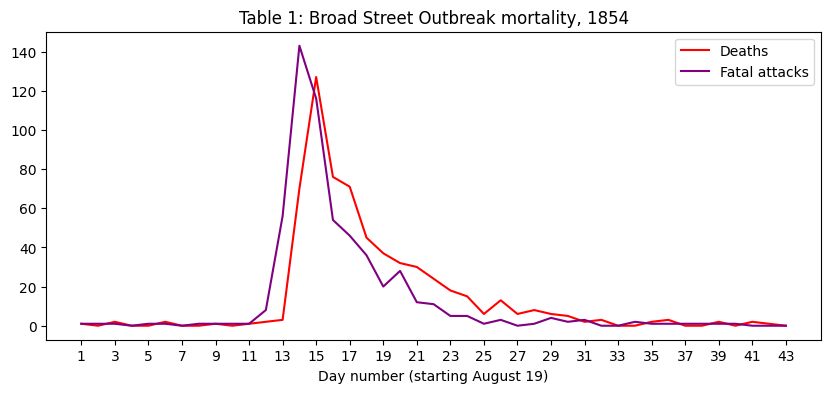

In [7]:
# plot

fig, ax = plt.subplots(figsize=(10,4))

ax.plot(table_1_df['Deaths'][:-1], label='Deaths', color='red')
ax.plot(table_1_df['No. of Fatal Attacks'][:-1], label='Fatal attacks', color='purple')
ax.set_title('Table 1: Broad Street Outbreak mortality, 1854')
ax.set_xlabel('Day number (starting August 19)')

ax.set_xticks(range(1,44,2))
ax.legend()

plt.show()

The pump handle was removed on the moring of september 8th. that is day 21, well past the peak of the outbreak. 

note that we did not include the 45 fatalities whose attack date is not known but death dates are known. 

##### table 2: 1832 water supply and cholera deaths by districts



so in this table the first three subdistricts are combined in terms of the numbers. we can't have a different entry for them because that would imply that all three have a population of 77 thousand. 

In [8]:
districts_2 = ["St. George the Martyr, Southwark, St. Olave's, Southwark, St. Saviour's, Southwark",
                   "Christchurch, Southwark", "Lambeth", "Newington", "Camberwell", "Bermondsey", "Rotherhithe",
                   "Bethnal Green", "St. George-in-the-East", "Poplar", "Stepney", "Whitechapel*",
                   "Clerkenwell", "St. Giles", "Holborn", "Islington", "London City", "East and West London",
                   "St. Luke's", "Strand", "Hackney", "Shoreditch", "Westminster", "St. George, Hanover Square", 
                   "Kensington", "St. Marylebone", "St. Pancras"]

population_2 = [77796,13705,87856,44526,28231,29741,12875,62018,38505,25066,78826,52848,
                47674,52907,27334,37316,55798,pd.NA,46642,9937,7326,68564,124585,58209,
                75130,122206,103548]

deaths_2 = [856,35,337,200,107,210,19,170,123,107,225,470,65,280,46,39,359,pd.NA,118,37,8,57,325,74,134,224,111]

deaths_in_10000_living_2 = [110,25,38,45,37,70,14,27,31,42,28,88,13,52,16,10,64,pd.NA,25,37,10,8,26,12,17,20,10]

water_supply_2 = ["Southwark Water Works, from Thames at London Bridge. No filter or settling reservoir.",
                "Chiefly by Lambeth Water Works, from Thames opposite Hungerford Market. No filter or settling reservoir.",
                "Chiefly by Lambeth Water Works, from Thames opposite Hungerford Market. No filter or settling reservoir.",
                "Chiefly by South London Water Works, from Thames at Vauxhall Bridge. Reservoirs. No filter.",
                "Chiefly by South London Water Works, from Thames at Vauxhall Bridge. Reservoirs. No filter.",
                "South London Water Works, and Tidal Ditches.", "South London Water Works, and Tidal Ditches.",
                "East London Water Works, from tidal part of river Lea at Old Ford.",
                "East London Water Works, from tidal part of river Lea at Old Ford."
                ,"East London Water Works, from tidal part of river Lea at Old Ford.",
                "East London Water Works, from tidal part of river Lea at Old Ford.",
                "East London Water Works, from tidal part of river Lea at Old Ford.",
                "New River Company, from various springs, and river Lea in Hertfordshire; and occasionally from Thames at Broken Wharf, near Blackfriar's Bridge.",
                "New River Company, from various springs, and river Lea in Hertfordshire; and occasionally from Thames at Broken Wharf, near Blackfriar's Bridge.",
                "New River Company, from various springs, and river Lea in Hertfordshire; and occasionally from Thames at Broken Wharf, near Blackfriar's Bridge.",
                "New River Company, from various springs, and river Lea in Hertfordshire; and occasionally from Thames at Broken Wharf, near Blackfriar's Bridge.",
                "New River Company, from various springs, and river Lea in Hertfordshire; and occasionally from Thames at Broken Wharf, near Blackfriar's Bridge.",
                "New River Company, from various springs, and river Lea in Hertfordshire; and occasionally from Thames at Broken Wharf, near Blackfriar's Bridge.",
                "New River Company, from various springs, and river Lea in Hertfordshire; and occasionally from Thames at Broken Wharf, near Blackfriar's Bridge.",
                "New River Company, from various springs, and river Lea in Hertfordshire; and occasionally from Thames at Broken Wharf, near Blackfriar's Bridge.",
                "New River and East London Water Companies.", "New River and East London Water Companies.",
                "Chelsea Water Works, from Thames at Chelsea. Reservoirs and filters.",
                "Chelsea Water Works and Grand Junction Water Works, also supplying water from Thames at Chelsea, and having settling reservoirs.",
                "Chelsea Water Works and Grand Junction Water Works, also supplying water from Thames at Chelsea, and having settling reservoirs.",
                "West Middlesex Water Works, from Thames at Hammersmith. Settling reservoirs.",
                "West Middlesex, New River, and Hampstead Water Works."]

In [9]:
# sanity check

len(districts_2), len(deaths_2), len(deaths_in_10000_living_2), len(water_supply_2)

(27, 27, 27, 27)

In [10]:
table_2_df = pd.DataFrame({'Districts': districts_2,
              'Population': population_2,
              'Deaths from Cholera': deaths_2,
              'Deaths from Cholera in 10,000 living': deaths_in_10000_living_2,
              'Water Supply': water_supply_2})

table_2_df.head()

,Districts,Population,Deaths from Cholera,"Deaths from Cholera in 10,000 living",Water Supply
0,"St. George the Martyr, Southwark, St. Olave's,...",77796,856,110,"Southwark Water Works, from Thames at London B..."
1,"Christchurch, Southwark",13705,35,25,"Chiefly by Lambeth Water Works, from Thames op..."
2,Lambeth,87856,337,38,"Chiefly by Lambeth Water Works, from Thames op..."
3,Newington,44526,200,45,"Chiefly by South London Water Works, from Tham..."
4,Camberwell,28231,107,37,"Chiefly by South London Water Works, from Tham..."


##### table 3: 1849 water supply and cholera deaths by districts


In [11]:
districts_3 = ['Rotherhithe', 'St. Olave, Southwark', 'St. George, Southwark', 'Bermondsey', 'St. Saviour, Southwark',
               'Newington', 'Lambeth', 'Wandsworth', 'Camberwell', 'West London', 'Bethnal Green', 'Shoreditch', 
               'Greenwich', 'Poplar', 'Westminster', 'Whitechapel', 'St. Giles', 'Stepney', 'Chelsea', 
               'East London', "St. George's, East", 'London City', 'St. Martin', 'Strand', 'Holborn', 'St. Luke', 
               'Kensington (except Paddington)', 'Lewisham', 'Belgrave', 'Hackney', 'Islington', 'St. Pancras', 
               'Clerkenwell', 'Marylebone', 'St. James, Westminster', 'Paddington', 'Hampstead', 'Hanover Square & May Fair']

population_1849_3 = [172_08,19_278,50_900,45_500,35_227,63_074,134_768,48_446,51_714,28_829,87_263,104_122,95_954,44_103,
                     64_109,78_590,54_062,106_988,53_379,43_495,47_334,55_816,24_557,44_254,46_134,53_234,110_491,32_299,
                     37_918,55_152,87_761,160_122,63_499,153_960,36_426,41_267,11_572,33_196]

deaths_3 = [352,349,836,734,539,907,1_618,484,504,429,789,789,718,313,437,506,
            285,501,247,182,199,207,91,156,161,183,260,96,105,139,187,360,121,261,57,35,9,26]

deaths_in_10000_inhabits_3 = [205,181,164,161,153,144,120,100,97,96,90,76,75,71,68,64,53,47,46,45,42,38,37,35,35,34,33,30,
                              28,25,22,22,19,17,16,8,8,8]

house_shop_value_3 = [4.238, 4.559, 3.518, 3.077, 5.291, 3.788, 4.389, 4.839, 4.508, 7.454, 1.480, 3.103, 3.379,
                      7.360, 4.189, 3.388, 5.635, 3.319, 4.210, 4.823, 4.753, 17.676, 11.844, 7.374, 5.883, 3.731, 5.070, 4.824,
                      8.875, 4.397, 5.494, 4.871, 4.138, 7.586, 12.669, 9.349, 5.804, 16.754]

water_supply_3 = ["Southwark and Vauxhall Water Works, Kent Water Works, and Tidal Ditches.", "Southwark and Vauxhall.",
                  "Southwark and Vauxhall, Lambeth.", "Southwark and Vauxhall.", "Southwark and Vauxhall.",
                  "Southwark and Vauxhall, Lambeth.", "Southwark and Vauxhall, Lambeth.",
                  "Pump-wells, Southwark and Vauxhall, river Wandle.", "Southwark and Vauxhall, Lambeth.", "New River.", 
                  "East London.", "New River, East London.", "Kent.", "East London.", "Chelsea.", "East London.", "New River.",
                  "East London.", "Chelsea.", "New River.", "East London.", "New River.", "New River.", "New River.", 
                  "New River.", "New River.", "West Middlesex, Chelsea, Grand Junction.", "Kent.", "Chelsea.", 
                  "New River, East London.", "New River.", "New River, Hampstead, West Middlesex.", "New River.", 
                  "West Middlesex.", "Grand Junction, New River.", "Grand Junction.", "Hampstead, West Middlesex.", 
                  "Grand Junction."]

In [12]:
# sanity check

len(districts_3), len(population_1849_3), len(deaths_3), len(deaths_in_10000_inhabits_3), len(house_shop_value_3), len(water_supply_3)

(38, 38, 38, 38, 38, 38)

In [13]:
table_3_df = pd.DataFrame({'District': districts_3,
              'Population in the middle of 1849': population_1849_3,
              'Deaths from Cholera': deaths_3,
              'Deaths by Cholera to 10,000 inhabits.': deaths_in_10000_inhabits_3,
              'Annual value of House & Shop room to each person in £': house_shop_value_3,
              'Water Supply': water_supply_3})

table_3_df.head()

,District,Population in the middle of 1849,Deaths from Cholera,"Deaths by Cholera to 10,000 inhabits.",Annual value of House & Shop room to each person in £,Water Supply
0,Rotherhithe,17208,352,205,4.238,"Southwark and Vauxhall Water Works, Kent Water..."
1,"St. Olave, Southwark",19278,349,181,4.559,Southwark and Vauxhall.
2,"St. George, Southwark",50900,836,164,3.518,"Southwark and Vauxhall, Lambeth."
3,Bermondsey,45500,734,161,3.077,Southwark and Vauxhall.
4,"St. Saviour, Southwark",35227,539,153,5.291,Southwark and Vauxhall.


In [14]:
# checking the sums

table_3_df[['Population in the middle of 1849', 'Deaths from Cholera']].sum()

Population in the middle of 1849    2322001
Deaths from Cholera                   14172
dtype: int64

the sums aren't matching the ones for London in the table. i wonder why? let's check the deaths per 10000:

In [15]:
(table_3_df['Deaths from Cholera'].sum() / table_3_df['Population in the middle of 1849'].sum()) * 10000

61.033565446354245

so very close to the given 62. good. lets check the individual values.

In [16]:
table_3_check = table_3_df.copy()

table_3_check['death per 10000 check'] = (table_3_df['Deaths from Cholera'] / table_3_df['Population in the middle of 1849']) * 10000

table_3_check[['District','Deaths by Cholera to 10,000 inhabits.', 'death per 10000 check']].head()

,District,"Deaths by Cholera to 10,000 inhabits.",death per 10000 check
0,Rotherhithe,205,204.556020
1,"St. Olave, Southwark",181,181.035377
2,"St. George, Southwark",164,164.243615
3,Bermondsey,161,161.318681
4,"St. Saviour, Southwark",153,153.007636


if you scan the table, there are two irregularities. West London and Kensington. why?


##### table 4: death in southvark, lambeth and kent areas


In [17]:
water_companies_4 = ["(1) Lambeth and (2) Southwark and Vauxhall", "Southwark and Vauxhall", 
                     "(1) Southwark and Vauxhall, (2) Kent"]

sources_of_supply_4 = ["Thames, at Thames ditton and at Battersea", "Thames, at Battersea", 
                       "Thames, at Battersea; the Ravensbourne, in Kent, & ditches and wells"]

population_4 = [346_363, 118_267, 17_805]

deaths_in_13_wks_4 = [211, 111, 19]

deaths_in_100000_4 = [61, 94, 107]

In [18]:
table_4_df = pd.DataFrame({'Water Companies.': water_companies_4,
              'Sources of Supply.': sources_of_supply_4,
              'Population (Aggregate of Districts supplied chiefly by the respective Companies)': population_4,
              'Deaths by Cholera in 13 wks. ending Nov. 19. (Aggregate of Districts supplied chiefly by the respective Companies)': deaths_in_13_wks_4,
              'Deaths in 100,000 inhabitants.': deaths_in_100000_4})

table_4_df

,Water Companies.,Sources of Supply.,Population (Aggregate of Districts supplied chiefly by the respective Companies),Deaths by Cholera in 13 wks. ending Nov. 19. (Aggregate of Districts supplied chiefly by the respective Companies),"Deaths in 100,000 inhabitants."
0,(1) Lambeth and (2) Southwark and Vauxhall,"Thames, at Thames ditton and at Battersea",346363,211,61
1,Southwark and Vauxhall,"Thames, at Battersea",118267,111,94
2,"(1) Southwark and Vauxhall, (2) Kent","Thames, at Battersea; the Ravensbourne, in Ken...",17805,19,107



##### table 5: weekly return of birth and death in december 1853 when cholera had mostly disappeared


In [25]:
districts_5 = ["Bermondsey", "S. Saviour, Southwark", "S. George, Southwark", "St. Olave", "Rotherhithe", "Whitechapel",
               "Newington", "Kensington,-except Paddington", "Wandsworth", "St. George (East)", "Camberwell", "Stepney",
               "Lambeth", "Greenwich", "Marylebone", "Westminster", "St. James, Westminster", "Hackney", "Paddington",
               "Shoreditch", "Bethnal Green", "Poplar", "West London", "Hanover Square and May Fair", "Islington", 
               "Chelsea", "East London", "London City", "Clerkenwell", "Belgrave", "St. Martin-in-the-Fields", "St. Pancras", 
               "St. Luke", "Lewisham", "Holborn", "St. Giles", "Strand", "Hampstead"]

population_1855_5 = [48_128, 35_731, 51_824, 19_375, 17_805, 79_759, 64_816, 73_699, 50_764, 48_376, 54_667, 110_775, 139_325, 99_365,
                     157_696, 65_609, 36_406, 58_429, 46_305, 109_257, 90_193, 47_162, 28_840, 33_196, 95_329, 56_538, 44_406,
                     55_932, 64_778, 40_034, 24_640, 166_956, 54_055, 34_835, 46_571, 54_214, 44_460, 11_986]

deaths_in_17_wks_5 = [73,52,74,26,20,78,37,40,26,21,22,40,48,32,48,19,9,13,10,23,18,9,4,5,12,6,4,5,5,3,1,
                      8,2,1,1,1,pd.NA,pd.NA]

deaths_by_100000_5 = [150,146,143,134,112,95,57,53,51,43,40,34,34,31,30,27,25,22,22,21,20,17,14,12,12,11,9,9,8,7,5,5,4,3,2,2,
                      pd.NA,pd.NA]

water_supply_5 = ["Southwark & Vauxhall.", "Southwark and Vauxhall, Lambeth.", 
                  "Southwark and Vauxhall, Lambeth.", "Southwark & Vauxhall.", "South. & Vaux., Kent.", 
                  "East London.", "Southwark and Vauxhall, Lambeth.", "West Middlesex, Chelsea, Grand Junction",
                  "South. & Vaux., Pumpwells, River Wandle.", "East London.", "Southwark and Vauxhall, Lambeth.",
                  "East London", "Lambeth, Sou. & Vaux.", "Kent", "West Middlesex.", "Chelsea", "Grand Junction, New River.",
                  "New Riv., East London.", "Grand Junction.", "New Riv., East London.", "East London.", "East London.", 
                  "New River.", "Grand Junction.", "New River.", "Chelsea.", "New River.", "New River.", "New River.", 
                  "Chelsea.", "New River.", "New River, Hampstead, West Middlesex.", "New River.", "Kent.", 
                  "New River.", "New River.", "New River.", "Hampst., West Midsex."]

In [26]:
# sanity check

len(districts_5), len(population_1855_5), len(deaths_in_17_wks_5), len(deaths_by_100000_5), len(water_supply_5)

(38, 38, 38, 38, 38)

In [28]:
table_5_df = pd.DataFrame({"Districts": districts_5,
              "Population in 1853 (estimated)": population_1855_5,
              "Deaths by Cholera in 17 wks, Aug. 21 to Dec. 17, 1853": deaths_in_17_wks_5,
              "Deaths by Cholera to 100,000 living": deaths_by_100000_5,
              "Water Supply": water_supply_5})

table_5_df.head()

,Districts,Population in 1853 (estimated),"Deaths by Cholera in 17 wks, Aug. 21 to Dec. 17, 1853","Deaths by Cholera to 100,000 living",Water Supply
0,Bermondsey,48128,73,150,Southwark & Vauxhall.
1,"S. Saviour, Southwark",35731,52,146,"Southwark and Vauxhall, Lambeth."
2,"S. George, Southwark",51824,74,143,"Southwark and Vauxhall, Lambeth."
3,St. Olave,19375,26,134,Southwark & Vauxhall.
4,Rotherhithe,17805,20,112,"South. & Vaux., Kent."


Lets check the totals now.

In [31]:
table_5_df["Population in 1853 (estimated)"].sum(), table_5_df["Deaths by Cholera in 17 wks, Aug. 21 to Dec. 17, 1853"].sum()

(2362236, 796)

Matches exactly!


##### table 6: august 1853 to jan 1854 southvark vs lambeth deaths


In [34]:
sub_districts_6 = ['St. Saviour, Southwark', 'St. Olvae', 'St. John, Horsleydown',
                 'St. James, Bermondsey', 'St. Mary Magdalen', 'Leather Market', 'Rotherhithe*',
                 'Wandsworth', 'Battersea', 'Putney', 'Camberwell', 'Peckham', 
                 'Christchurch, Southwk.', 'Kent Road', 'Borough Road', 'London Road',
                 'Trinity, Newington', 'St. Peter, Walworth', 'St. Mary, Newington',
                 'Waterloo Road (1st part)', 'Waterloo Road (2nd part)', 'Lambeth Church (1st part)', 
                 'Lambeth Church (2nd part)', 'Kennington (1st part)', 'Kennington (2nd part)', 
                 'Brixton', 'Clapham', 'St. George, Camberwell', 'Norwood', 'Streatham',
                 'Dulwich']

population_1851_6 = [19_709, 8_015, 11_360, 18_899, 13_934, 15_295, 17_805, 9_611, 10_560, 5_280, 17_742, 19_444,
                     16_022, 18_126, 15_862, 17_836, 20_922, 29_861, 14_033, 14_088, 18_348, 18_409, 26_784,
                     24_261, 18_848, 14_610, 16_290, 15_849, 3_977, 9_023, 1_632]

deaths_1853_6 = [45, 19, 7, 21, 27, 23, 20, 3, 11, pd.NA, 9, 7, 7, 37, 26, 9, 11, 23, 5, 1, 7, 9, 11, 12, 6, 2, 10, 6,
                 pd.NA, pd.NA, pd.NA]

deaths_in_100000_6 = [227, 237, 61, 111, 193, 153, 112, 31, 104, pd.NA, 50, 36, 43, 204, 163, 50, 52, 77, 35, 7, 38,
                      48, 41, 49, 31, 13, 61, 37, pd.NA, pd.NA, pd.NA]

water_supply_6 = ["Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company only.", "Lambeth Water Company only.", "Lambeth Water Company only."]

In [35]:
# sanity check

len(sub_districts_6), len(population_1851_6), len(deaths_1853_6), len(deaths_in_100000_6), len(water_supply_6)

(31, 31, 31, 31, 31)

In [37]:
table_6_1_df = pd.DataFrame({"Sub-Districts": sub_districts_6,
              "Population in 1851": population_1851_6,
              "Deaths from Cholera in 1853": deaths_1853_6,
              "Deaths by Cholera in each 100,000 living": deaths_in_100000_6,
              "Water Supply": water_supply_6})

table_6_1_df.head()

,Sub-Districts,Population in 1851,Deaths from Cholera in 1853,"Deaths by Cholera in each 100,000 living",Water Supply
0,"St. Saviour, Southwark",19709,45,227,Southwark and Vauxhall Water Company only.
1,St. Olvae,8015,19,237,Southwark and Vauxhall Water Company only.
2,"St. John, Horsleydown",11360,7,61,Southwark and Vauxhall Water Company only.
3,"St. James, Bermondsey",18899,21,111,Southwark and Vauxhall Water Company only.
4,St. Mary Magdalen,13934,27,193,Southwark and Vauxhall Water Company only.


Now lets get the second part of this table

In [88]:
table_6_2_df = table_6_1_df.groupby("Water Supply").agg({"Population in 1851": sum, "Deaths from Cholera in 1853": sum}).sort_index(ascending=False)

table_6_2_df["Deaths by Cholera in each 100,000 living"] = (table_6_2_df['Deaths from Cholera in 1853'] / table_6_2_df['Population in 1851']) * 100000

table_6_2_df

,Population in 1851,Deaths from Cholera in 1853,"Deaths by Cholera in each 100,000 living"
Water Supply,,,
Southwark and Vauxhall Water Company only.,167654,192,114.521574
"Lambeth Water Company, and Southwark and Vauxhall Company.",300149,182,60.636551
Lambeth Water Company only.,14632,0,0.0


it gives zero for lambeth. is this really correct?


##### table 7: mortality from cholera in four weeks ending 5 august 1853


the following lists are used in both table 7 and 8.

In [44]:
sub_districts_7_8 = ['St. Saviour, Southwark', 'St. Olvae, Southward', 'St. John, Horsleydown',
                 'St. James, Bermondsey', 'St. Mary Magdalen', 'Leather Market', 'Rotherhithe',
                 'Battersea', 'Wandsworth', 'Putney', 'Camberwell', 'Peckham', 
                 'Christchurch, Southwk.', 'Kent Road', 'Borough Road', 'London Road',
                 'Trinity, Newington', 'St. Peter, Walworth', 'St. Mary, Newington',
                 'Waterloo Road (1st)', 'Waterloo Road (2nd)', 'Lambeth Church (1st)', 
                 'Lambeth Church (2nd)', 'Kennington (1st)', 'Kennington (2nd)', 
                 'Brixton', 'Clapham', 'St. George, Camberwell', 'Norwood', 'Streatham',
                 'Dulwich', 'Sydenham']

population_in_1851_7_8 = [19709, 8015, 11360, 18899, 13934, 15295, 17805, 10560, 9611, 5280,
                      17742, 19444, 16022, 18126, 15862, 17836, 20922, 29861, 14033, 14088,
                      18348, 18409, 26784, 24261, 18848, 14610, 16290, 15849, 3977, 9023, 1632, 4501]


In [45]:
# sanity check
len(sub_districts_7_8), len(population_in_1851_7_8)

(32, 32)

In [46]:
deaths_7 = [26,19,18,29,20,23,26,13,2,1,19,4,3,8,21,9,14,
                      20,5,5,5,5,10,11,3,1,5,9,pd.NA,pd.NA,pd.NA,pd.NA]

southvark_deaths_7 = [24,15,17,23,19,23,17,10,pd.NA,pd.NA,19,4,2,7,20,5,
                    14,20,5,5,5,2,7,9,3,pd.NA,4,7,pd.NA,pd.NA,pd.NA,pd.NA]

lambeth_deaths_7 = [pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,
                1,1,1,4,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,1,2,1,pd.NA,1,pd.NA,2,pd.NA,pd.NA,pd.NA,pd.NA]

pump_deaths_7 = [pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,1,pd.NA,1,pd.NA,pd.NA,
                 pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,1,pd.NA,pd.NA,1,
                 pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,]

river_etc_7 = [2,2,1,6,1,pd.NA,9,2,2,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,
               pd.NA,pd.NA,pd.NA,1,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,]

unknown_7 = [pd.NA,2,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,
             pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,1,1,pd.NA,pd.NA,pd.NA,
             pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,]

In [47]:
# sanity check

len(deaths_7), len(southvark_deaths_7), len(lambeth_deaths_7), len(pump_deaths_7), len(river_etc_7), len(unknown_7)

(32, 32, 32, 32, 32, 32)

In [48]:
table_7_df = pd.DataFrame({'Sub-Districts': sub_districts_7_8,
                           'Population in 1851': population_in_1851_7_8,
                           'Deaths from Cholera in four weeks ending August 5th': deaths_7,
                           'Southvark & Vauxhall': southvark_deaths_7,
                           'Lambeth': lambeth_deaths_7,
                           'Pump-wells': pump_deaths_7,
                           'River Thames, ditches etc': river_etc_7,
                           'Unascertained': unknown_7})

table_7_df.head()

,Sub-Districts,Population in 1851,Deaths from Cholera in four weeks ending August 5th,Southvark & Vauxhall,Lambeth,Pump-wells,"River Thames, ditches etc",Unascertained
0,"St. Saviour, Southwark",19709,26,24,<NA>,<NA>,2,<NA>
1,"St. Olvae, Southward",8015,19,15,<NA>,<NA>,2,2
2,"St. John, Horsleydown",11360,18,17,<NA>,<NA>,1,<NA>
3,"St. James, Bermondsey",18899,29,23,<NA>,<NA>,6,<NA>
4,St. Mary Magdalen,13934,20,19,<NA>,<NA>,1,<NA>



##### table 8: mortality from cholera in four weeks ending 26 august 1853


In [49]:
deaths_8 = [125,53,51,123,87,81,103,54,11,1,96,59,25,57,71,29,58,90,
            21,10,36,18,53,71,38,9,24,42,8,6,pd.NA,4]

southvark_deaths_8 = [115,43,48,102,83,81,68,42,1,pd.NA,96,59,11,52,61,
                      21,52,84,19,9,25,6,34,63,34,5,19,30,pd.NA,pd.NA,pd.NA,pd.NA]

lambeth_deaths_8 = [pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,
                    13,5,7,8,6,4,1,1,8,9,13,5,3,2,pd.NA,9,2,1,pd.NA,1]

pump_deaths_8 = [pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,4,2,1,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,
                 pd.NA,pd.NA,pd.NA,1,pd.NA,1,pd.NA,1,3,1,pd.NA,5,2,1,5,pd.NA,2]

river_etc_8 = [10,5,3,21,4,pd.NA,35,8,8,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,
               pd.NA,pd.NA,2,1,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,5,pd.NA,pd.NA,pd.NA]

unknown_8 = [pd.NA,5,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,pd.NA,1,pd.NA,3,
             pd.NA,pd.NA,2,pd.NA,pd.NA,pd.NA,2,5,pd.NA,pd.NA,2,pd.NA,1,pd.NA,pd.NA,pd.NA,1]

In [50]:
# sanity check

len(deaths_8), len(southvark_deaths_8), len(lambeth_deaths_8), len(pump_deaths_8), len(river_etc_8), len(river_etc_8)

(32, 32, 32, 32, 32, 32)

In [51]:
table_8_df = pd.DataFrame({'Sub-Districts': sub_districts_7_8,
                           'Population in 1851': population_in_1851_7_8,
                           'Deaths from Cholera in seven weeks ending August 26th': deaths_8,
                           'Southvark & Vauxhall': southvark_deaths_8,
                           'Lambeth': lambeth_deaths_8,
                           'Pump-wells': pump_deaths_8,
                           'River Thames, ditches etc': river_etc_8,
                           'Unascertained': unknown_8})

table_8_df.head()

,Sub-Districts,Population in 1851,Deaths from Cholera in seven weeks ending August 26th,Southvark & Vauxhall,Lambeth,Pump-wells,"River Thames, ditches etc",Unascertained
0,"St. Saviour, Southwark",19709,125,115,<NA>,<NA>,10,<NA>
1,"St. Olvae, Southward",8015,53,43,<NA>,<NA>,5,5
2,"St. John, Horsleydown",11360,51,48,<NA>,<NA>,3,<NA>
3,"St. James, Bermondsey",18899,123,102,<NA>,<NA>,21,<NA>
4,St. Mary Magdalen,13934,87,83,<NA>,<NA>,4,<NA>



##### table 9: southvark vs lambeth deaths during the first seven weeks of the epidemic of 1853


In [52]:
number_of_houses_9 = [40046, 26107, 256423]
deaths_from_cholera_9 = [1263,98,1422]
deaths_in_each_10000_houses_9 = [315, 37, 59]


In [53]:
table_9_df = pd.DataFrame({'Number of houses': number_of_houses_9,
              'Deaths from Cholera': deaths_from_cholera_9,
              'Deaths in each 10000 houses': deaths_in_each_10000_houses_9},
              index=['Southvark and Vauxhall Company', 'Lambeth Company', 'Rest of London'])

table_9_df

,Number of houses,Deaths from Cholera,Deaths in each 10000 houses
Southvark and Vauxhall Company,40046,1263,315
Lambeth Company,26107,98,37
Rest of London,256423,1422,59


In [54]:
table_9_df_check = table_9_df.copy()

table_9_df_check['check death proportion'] = (table_9_df_check['Deaths from Cholera'] / table_9_df_check['Number of houses']) * 10000

table_9_df_check

,Number of houses,Deaths from Cholera,Deaths in each 10000 houses,check death proportion
Southvark and Vauxhall Company,40046,1263,315,315.387305
Lambeth Company,26107,98,37,37.537825
Rest of London,256423,1422,59,55.455244


the last entry does not match. i wonder why?


##### table 10: sourthvark vs lambeth deaths during the next seven weeks of the epidemic of 1853 (three other companies included)


In [55]:
start_date_10 = date(1854,9,2)
week_ending_10 = pd.date_range(start_date_10,periods=7,freq='7d')

In [56]:
total_deaths_from_cholera_10 = [670, 972, 856, 724, 383, 200, 115]
southvark_deaths_10 = [399, 580, 524, 432, 228, 121, 69]
lambeth_deaths_10 = [45, 72, 66, 72, 25, 14, 8]
kent_deaths_10 = [38, 45, 48, 28, 19, 10, 3]
pumps_and_other_deaths_10 = [72, 62, 44, 62, 24, 9, 6]
uncertain_source_deaths_10 = [116, 213, 174, 130, 87, 46, 29]

In [57]:
table_10_df = pd.DataFrame({'Deaths from Cholera': total_deaths_from_cholera_10,
              'Southvark and Vauxhall': southvark_deaths_10,
              'Lambeth': lambeth_deaths_10,
              'Kent Company': kent_deaths_10,
              'Pumps and other sources': pumps_and_other_deaths_10,
              'Not ascertained': uncertain_source_deaths_10},
              index=week_ending_10)

table_10_df

,Deaths from Cholera,Southvark and Vauxhall,Lambeth,Kent Company,Pumps and other sources,Not ascertained
1854-09-02,670,399,45,38,72,116
1854-09-09,972,580,72,45,62,213
1854-09-16,856,524,66,48,44,174
1854-09-23,724,432,72,28,62,130
1854-09-30,383,228,25,19,24,87
1854-10-07,200,121,14,10,9,46
1854-10-14,115,69,8,3,6,29


In [58]:
table_10_df_check = table_10_df.copy()

table_10_df_check['Total Deaths'] = table_10_df_check['Southvark and Vauxhall'] + table_10_df_check['Lambeth'] + table_10_df_check['Kent Company'] + table_10_df_check['Pumps and other sources'] + table_10_df_check['Not ascertained']

table_10_df_check[['Deaths from Cholera', 'Total Deaths']]

,Deaths from Cholera,Total Deaths
1854-09-02,670,670
1854-09-09,972,972
1854-09-16,856,856
1854-09-23,724,724
1854-09-30,383,383
1854-10-07,200,200
1854-10-14,115,115


the following sums match the last row of the table.

In [59]:
table_10_df_check.sum()

Deaths from Cholera        3920
Southvark and Vauxhall     2353
Lambeth                     302
Kent Company                191
Pumps and other sources     279
Not ascertained             795
Total Deaths               3920
dtype: int64


##### table 11: combination of table 8 and 10 to calculate deaths in 14 weeks of the epidemic, ending october 14


In [60]:
index_11 = ['London', 'West Districts', 'North Districts', 'Central Districts', 
            'East Districts', 'South Districts', 
            'Houses supplied by Southvark and Vauxhall Company',
            'Houses supplied by Lambeth Company']

population_1851_11 = [2_362_236, 376_427, 490_396, 393_256, 485_522, 616_635, 266_516, 173_748]
deaths_by_cholera_in_14_weeks_11 = [10_367, 1_992, 735, 612, 1_461, 5_567, 4_093, 461]
deaths_in_10000_living_11 = [43, 53, 14, 15, 30, 90, 153, 26]

In [61]:
# sanity check

len(index_11), len(population_1851_11), len(deaths_by_cholera_in_14_weeks_11), len(deaths_in_10000_living_11)

(8, 8, 8, 8)

In [62]:
table_11_df = pd.DataFrame({'Population in 1851': population_1851_11,
              'Deaths by Cholera in 14 wks ening Oct 14': deaths_by_cholera_in_14_weeks_11,
              'Deaths in 10,000 living': deaths_in_10000_living_11},
              index=index_11)

table_11_df

,Population in 1851,Deaths by Cholera in 14 wks ening Oct 14,"Deaths in 10,000 living"
London,2362236,10367,43
West Districts,376427,1992,53
North Districts,490396,735,14
Central Districts,393256,612,15
East Districts,485522,1461,30
South Districts,616635,5567,90
Houses supplied by Southvark and Vauxhall Company,266516,4093,153
Houses supplied by Lambeth Company,173748,461,26


In [63]:
table_11_london = table_11_df.head(1)

table_11_london

,Population in 1851,Deaths by Cholera in 14 wks ening Oct 14,"Deaths in 10,000 living"
London,2362236,10367,43


In [64]:
table_11_districts = table_11_df[(table_11_df.index == 'West Districts') |
                                 (table_11_df.index == 'North Districts') |
                                  (table_11_df.index == 'Central Districts') |
                                   (table_11_df.index == 'East Districts') |
                                    (table_11_df.index == 'South Districts') ]

table_11_districts

,Population in 1851,Deaths by Cholera in 14 wks ening Oct 14,"Deaths in 10,000 living"
West Districts,376427,1992,53
North Districts,490396,735,14
Central Districts,393256,612,15
East Districts,485522,1461,30
South Districts,616635,5567,90


In [65]:
table_11_water = table_11_df[(table_11_df.index == 'Houses supplied by Southvark and Vauxhall Company') |
                                (table_11_df.index == 'Houses supplied by Lambeth Company')]

table_11_water

,Population in 1851,Deaths by Cholera in 14 wks ening Oct 14,"Deaths in 10,000 living"
Houses supplied by Southvark and Vauxhall Company,266516,4093,153
Houses supplied by Lambeth Company,173748,461,26


In [66]:
table_11_districts.sum()

Population in 1851                          2362236
Deaths by Cholera in 14 wks ening Oct 14      10367
Deaths in 10,000 living                         202
dtype: int64

In [67]:
table_11_london

,Population in 1851,Deaths by Cholera in 14 wks ening Oct 14,"Deaths in 10,000 living"
London,2362236,10367,43


why are deaths in 10000 living different? because its not correct to add up proportion from different populations. the correct way to calculate it would be:

In [68]:
(table_11_london['Deaths by Cholera in 14 wks ening Oct 14'] / table_11_london['Population in 1851'])*10000

London    43.886386
dtype: float64

In [69]:
table_11_water.sum()

Population in 1851                          440264
Deaths by Cholera in 14 wks ening Oct 14      4554
Deaths in 10,000 living                        179
dtype: int64


##### table 12: comparision of deaths in london subdistricts in 1849 and 1854 by water company


the sub_district list is the same as of table 6 except for added sydenham.

In [81]:
sub_districts_12 = ['St. Saviour, Southwark', 'St. Olvae', 'St. John, Horsleydown',
                 'St. James, Bermondsey', 'St. Mary Magdalen', 'Leather Market', 'Rotherhithe*',
                 'Wandsworth', 'Battersea', 'Putney', 'Camberwell', 'Peckham', 
                 'Christchurch, Southwk.', 'Kent Road', 'Borough Road', 'London Road',
                 'Trinity, Newington', 'St. Peter, Walworth', 'St. Mary, Newington',
                 'Waterloo Road (1st part)', 'Waterloo Road (2nd part)', 'Lambeth Church (1st part)', 
                 'Lambeth Church (2nd part)', 'Kennington (1st part)', 'Kennington (2nd part)', 
                 'Brixton', 'Clapham', 'St. George, Camberwell', 'Norwood', 'Streatham',
                 'Dulwich', 'Sydenham']

deaths_1849_12 = [283,157,192,249,259,226,352,97,111,8,235,92,
                  256,267,312,257,318,446,143,193,243,215,544,187,153,81,114,176,
                  2,154,1,5]

deaths_1854_12 = [371,161,148,362,244,237,282,59,171,9,240,174,
                  113,174,270,93,210,388,92,58,117,49,193,303,142,48,165,132,
                  10,15,pd.NA,12]

water_supply_12 = ["Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Southwark and Vauxhall Water Company only.","Southwark and Vauxhall Water Company only.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company, and Southwark and Vauxhall Company.",
                  "Lambeth Water Company only.", "Lambeth Water Company only.", "Lambeth Water Company only.",
                  "Lambeth Water Company only."]

In [82]:
# sanity check

len(sub_districts_12), len(deaths_1849_12), len(deaths_1854_12), len(water_supply_12)

(32, 32, 32, 32)

In [85]:
table_12_1_df = pd.DataFrame({'Sub-Districts': sub_districts_12,
              'Deaths from Cholera in 1849': deaths_1849_12,
              'Deaths from Cholera in 1854': deaths_1854_12,
              'Water Supply': water_supply_12})

table_12_1_df.head()

,Sub-Districts,Deaths from Cholera in 1849,Deaths from Cholera in 1854,Water Supply
0,"St. Saviour, Southwark",283,371,Southwark and Vauxhall Water Company only.
1,St. Olvae,157,161,Southwark and Vauxhall Water Company only.
2,"St. John, Horsleydown",192,148,Southwark and Vauxhall Water Company only.
3,"St. James, Bermondsey",249,362,Southwark and Vauxhall Water Company only.
4,St. Mary Magdalen,259,244,Southwark and Vauxhall Water Company only.


Now lets get the second part of this table

In [89]:
table_12_2_df = table_12_1_df.groupby('Water Supply').agg({"Deaths from Cholera in 1849": sum,
                                           "Deaths from Cholera in 1854": sum}).sort_index(ascending=False)

table_12_2_df

,Deaths from Cholera in 1849,Deaths from Cholera in 1854
Water Supply,,
Southwark and Vauxhall Water Company only.,2261,2458
"Lambeth Water Company, and Southwark and Vauxhall Company.",3905,2547
Lambeth Water Company only.,162,37



##### table 13: 1854 epidemic, 15 weeks ending october 21, death comparision by chealsea water company and southvark water company. 


In [77]:
water_supply_13 = ["Chelsea, south", "Chelsea, north-west", "Chelsea, north-east", "Belgrave", "St. John, Westminster", 
                   "St. Margaret, Westminster", "Total of districts supplied by the Chelsea Water Company", 
                   "Houses supplied by the Southwark and Vauxhall Company", "London", 
                   "London, except the houses supplied by the Chelsea Company, and by the Southwark & Vauxhall Compy."]

population_1851_13 = [19_050, 17_669, 19_819, 40_034, 34_295, 31_314, 162_181, 266_516, 2_362_236, 1_933_539]

deaths_in_15_wks_13 = [122,99,71,238,173,238,941,2_900,10_530,6_689]

death_per_10000_13 = [64,56,36,59,50,76,56,108,45,34]

In [78]:
table_13_1_df = pd.DataFrame({"":water_supply_13,
              "Population in 1851": population_1851_13,
               "Deaths by Cholera In 15 wks. ending October 21": deaths_in_15_wks_13,
                "Deaths by Cholera To every 10,000 living": death_per_10000_13 })

table_13_1_df

,,Population in 1851,Deaths by Cholera In 15 wks. ending October 21,"Deaths by Cholera To every 10,000 living"
0,"Chelsea, south",19050,122,64
1,"Chelsea, north-west",17669,99,56
2,"Chelsea, north-east",19819,71,36
3,Belgrave,40034,238,59
4,"St. John, Westminster",34295,173,50
5,"St. Margaret, Westminster",31314,238,76
6,Total of districts supplied by the Chelsea Wat...,162181,941,56
7,Houses supplied by the Southwark and Vauxhall ...,266516,2900,108
8,London,2362236,10530,45
9,"London, except the houses supplied by the Chel...",1933539,6689,34



##### table 13.1 (unnumbered table): showing london and other city populations that were hit by the epidemic


In [97]:
number_of_places = [52, 43, 33, 34]
duration_in_days = ['0 to 50', '50 to 100', '100 and upwards', '100 and upwards']
average_population = [6624, 12624, 38123, 78823]

note: its misprinted in the digital pamplet '50 to 100000' instead of '50 to 100'

In [98]:
table_13_1_df = pd.DataFrame({'No. of Places': number_of_places,
              'Duration in Days': duration_in_days,
              'Average Population': average_population})

table_13_1_df

,No. of Places,Duration in Days,Average Population
0,52,0 to 50,6624
1,43,50 to 100,12624
2,33,100 and upwards,38123
3,34,100 and upwards,78823



##### table 14: cholera deaths by occupation (which year? 1854?)



In [90]:
index_14 = ['Agents', 'Bricklayers and builders', 'Cowkeepers, dairymen, and milkmen', 'Egg merchants', 
         'Fishmongers','Fruiterers and greengrocers', 'Jobmasters, livery-stable keepers', 'Oilmen', 
         'Paper-makers', 'Poulterers', 'Sail-makers', 'Turners', 'Ballast-heavers', 
         'Coal-porters and coal-heavers', 'Dustmen and scavengers', 'Founders', 'Hawkers, etc', 
         'Lithographers', 'Modellers', 'Polishers', 'Sailors, including Greenwich pensioners', 
         'Tanners', 'Weavers', 'Physicians, surgeoons & general practioners', 
         'Magistrates, barristers, conveyancers, and attorneys', 'Merchants', 'Auctioners', 
         'Saddlers', 'Brass-finishers', 'Coach-makers', 'Cork-cutters',
         'Footmen and men-servants', 'Jewellers, goldsmiths, and silversmiths', 'Millwrights',
         'Tallow-chandlers', 'Type-founders', 'Undertakers', 'Warehousemen', 
         'Watchmakers', 'Wheelwrights']

no_of_deaths = [12,14,8,5,11,12,5,13,2,3,2,2,7,53,6,10,67,3,3,4,
                299,22,102,16,13,11,1,1,3,16,2,25,6,2,2,1,2,8,11,8]

ratio_numbers = [49,39,20,6,20,28,37,46,15,32,30,50,24,32,39,12,22,48,41,36,24,39,36,
                 265,375,348,266,250,318,262,279,1572,583,266,430,390,325,472,364,294]

ratio = [f'1 in {x}' for x in ratio_numbers]

In [91]:
# sanity check

len(index_14), len(no_of_deaths), len(ratio)

(40, 40, 40)

In [92]:
table_14_df = pd.DataFrame({'No. of Deaths': no_of_deaths,
              'Ratio': ratio}, index=index_14)

table_14_df.head()

,No. of Deaths,Ratio
Agents,12,1 in 49
Bricklayers and builders,14,1 in 39
"Cowkeepers, dairymen, and milkmen",8,1 in 20
Egg merchants,5,1 in 6
Fishmongers,11,1 in 20


In [95]:
table_14_modified = table_14_df.copy()

table_14_modified['Ratio in decimal'] = table_14_df['Ratio'].apply(lambda x:  1 / int(x.split()[-1]))

In [97]:
table_14_modified.head()

,No. of Deaths,Ratio,Ratio in decimal
Agents,12,1 in 49,0.020408
Bricklayers and builders,14,1 in 39,0.025641
"Cowkeepers, dairymen, and milkmen",8,1 in 20,0.050000
Egg merchants,5,1 in 6,0.166667
Fishmongers,11,1 in 20,0.050000


In [99]:
table_14_modified[table_14_modified['Ratio in decimal'] == table_14_modified['Ratio in decimal'].min()]

,No. of Deaths,Ratio,Ratio in decimal
Footmen and men-servants,25,1 in 1572,0.000636


In [100]:
table_14_modified[table_14_modified['Ratio in decimal'] == table_14_modified['Ratio in decimal'].max()]

,No. of Deaths,Ratio,Ratio in decimal
Egg merchants,5,1 in 6,0.166667
